In [2]:
import pandas as pd
import sqlite3

In [3]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

## analyze only the users and not the admins

In [22]:
timestamp = pd.read_sql("SELECT timestamp FROM checker " \
"WHERE uid LIKE 'user_%' ", connection)

datetime = pd.read_sql("SELECT datetime FROM pageviews " \
"WHERE uid LIKE 'user_%'", connection)

In [23]:
datetime["datetime"] = pd.to_datetime(datetime["datetime"]).dt.date
timestamp['timestamp'] = pd.to_datetime(timestamp["timestamp"]).dt.date

In [ ]:
timestamp = pd.DataFrame(timestamp.groupby('timestamp').size()).reset_index().rename(columns={'timestamp' :'date', 0 : 'commits'})
datetime = pd.DataFrame(datetime.groupby('datetime').size()).reset_index().rename(columns={'datetime' :'date', 0 : 'views'})

In [27]:
connection.close()

## analyze only the dates when there were both views and checker commits

In [25]:
data = pd.merge(datetime, timestamp, on="date")
data

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


* use size of the font should be 8
* the size of the figure is (15,8)

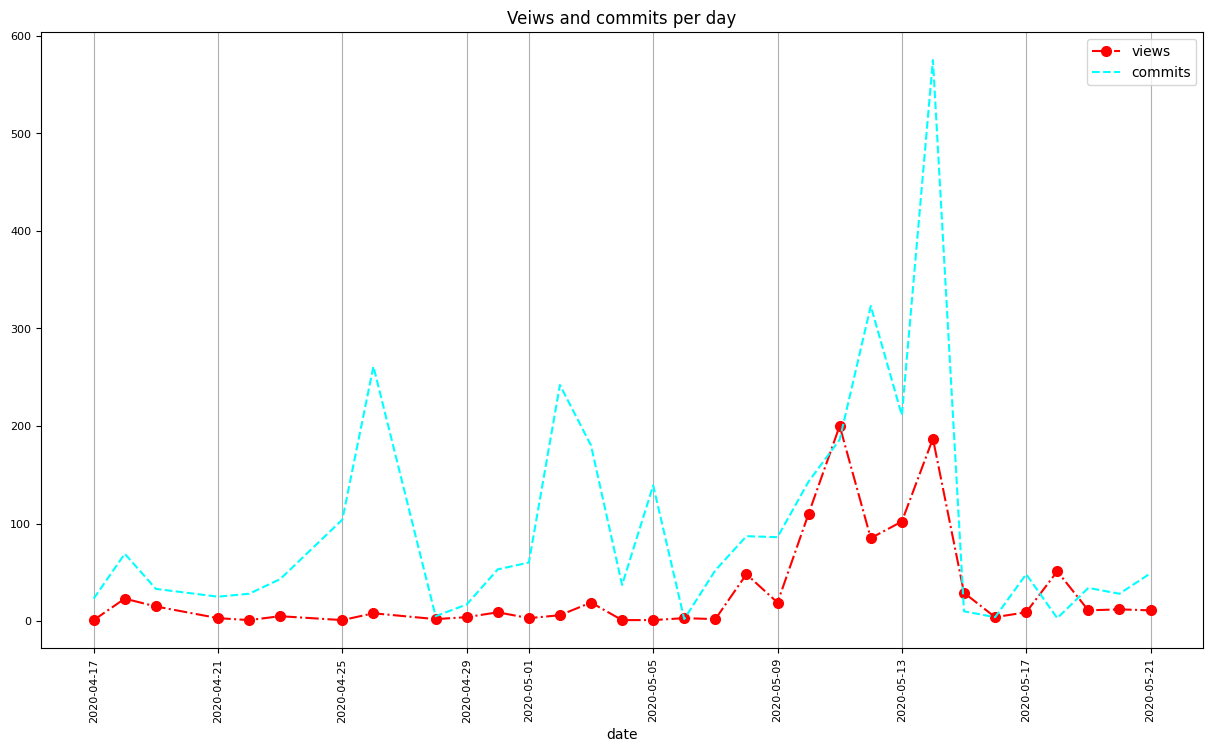

In [26]:
ax = data.plot(x='date', y='views', fontsize=8, figsize=(15, 8), title='Veiws and commits per day', \
                color='red', marker='o', markersize=7, linestyle='-.')
data.plot(x='date', y='commits', color='cyan', linestyle='--', ax=ax)
ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.grid(axis='x', linestyle='-')

## at the end of your Jupyter Notebook create a markdown cell and insert the question: “How many times was the number of views larger than 150?” Insert: “The answer is ___”. Put the number in the text instead of the underline.

In [32]:
len(data.query('views > 150'))

2

## “The answer is 2”.